In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_svmlight_file
import itertools
import optimization
import oracles

## Эксперимент: Выбор длины шага в субградиентном методе

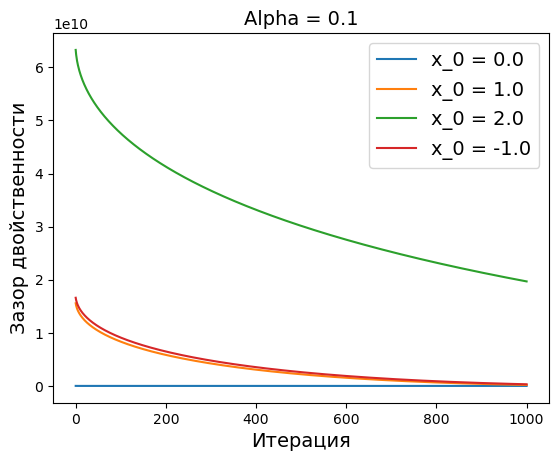

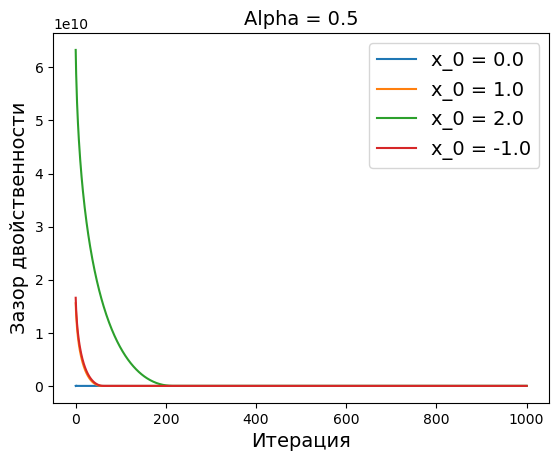

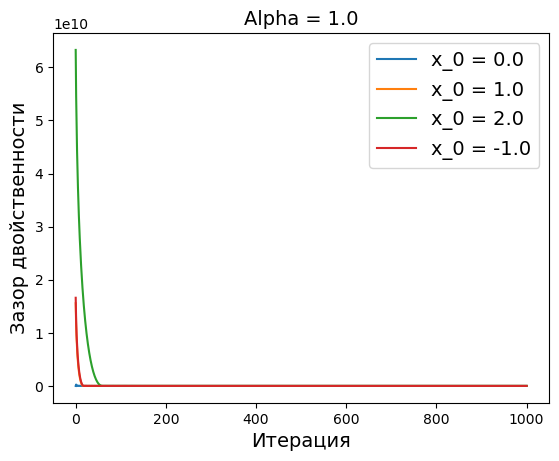

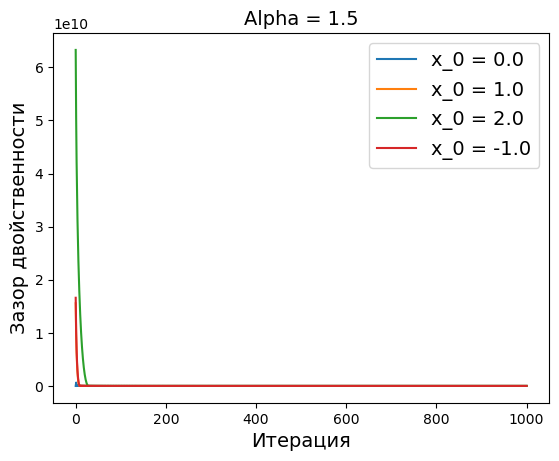

In [2]:
# Генерируем искусственные данные
A = np.random.uniform(0, 1000, (50, 50))
b = np.random.uniform(0, 1000, 50)
regcoef = np.random.uniform(0, 100, 1)
oracle = oracles.create_lasso_prox_oracle(A, b, regcoef)

alphas = [0.1, 0.5, 1., 1.5]
default = np.zeros(A.shape[1])
xs = [default, default + 1, default + 2, default - 1]
for alpha in alphas:
    all_func = []
    plt.figure()
    for x in xs:
        _, _, history = optimization.subgradient_method(oracle, x_0 = x, alpha_0 = alpha, trace=True)       
        plt.plot( list(range(len(history['duality_gap']))), history['duality_gap'], label="x_0 = {}".format(x[0]))
    plt.xlabel('Итерация', fontsize=14)
    plt.ylabel('Зазор двойственности', fontsize=14)
    plt.title('Alpha = {}'.format(alpha), fontsize=14)
    plt.legend(fontsize=14)
    plt.savefig('alpha_{}'.format(alpha) + '.png', dpi = 300)

## Эксперимент: Среднее число итераций одномерного поиска в градиентных методах

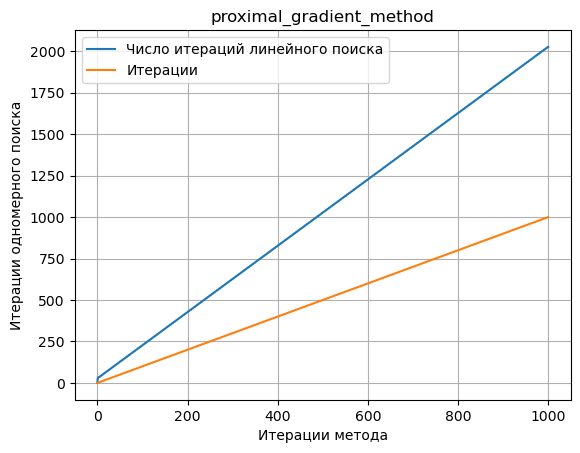

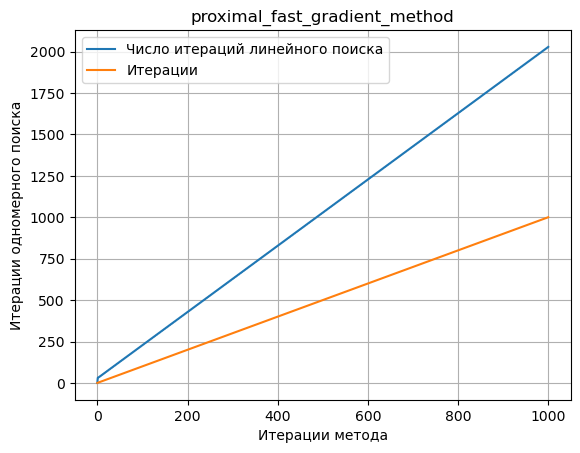

In [2]:
# Генерируем искусственные данные
A = np.random.uniform(0, 1000, (50, 50))
b = np.random.uniform(0, 1000, 50)
regcoef = np.random.uniform(0, 100, 1)

methods = [optimization.proximal_gradient_method, optimization.proximal_fast_gradient_method] 
oracle = oracles.create_lasso_prox_oracle(A, b, regcoef)
x_0 = np.zeros(A.shape[1])

for method in methods:
    _, _, history = method(oracle, x_0, trace=True)
    y = history['iter_search']
    x = np.array(list(range(len(y))))
    plt.figure()
    plt.title(method.__name__)
    plt.xlabel('Итерации метода')
    plt.ylabel('Итерации одномерного поиска')
    plt.plot(x, y, label='Число итераций линейного поиска')
    plt.plot(x, x, label='Итерации')
    plt.legend()
    plt.grid()
    plt.savefig(method.__name__ + '.png', dpi = 300)

## Эксперимент: Сравнение методов

C:\Users\PC\AppData\Local\Temp\ipykernel_15832\3745610813.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


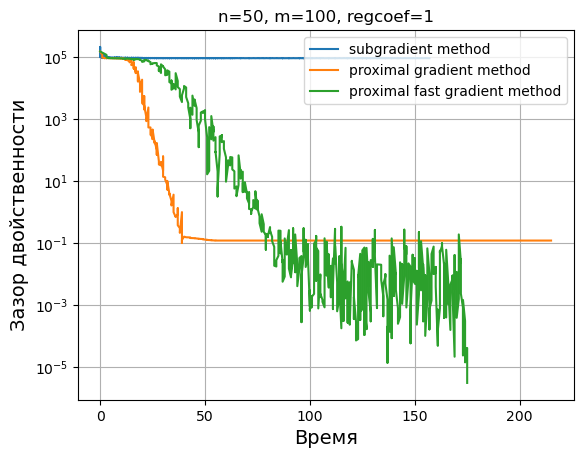

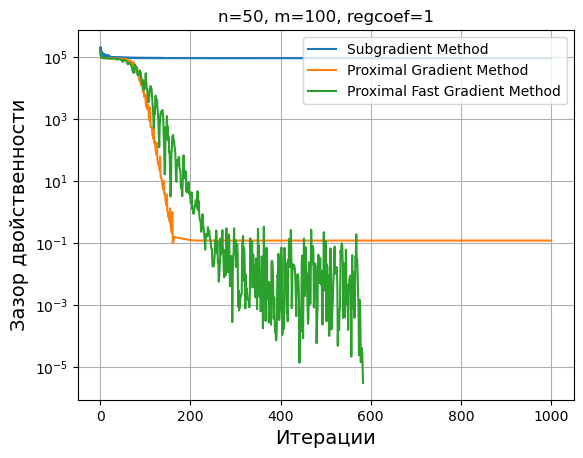

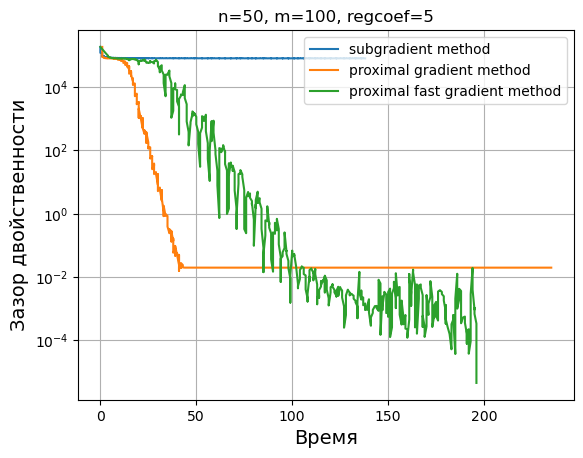

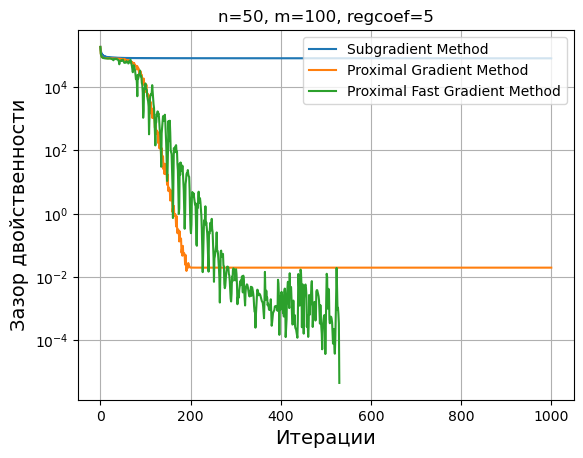

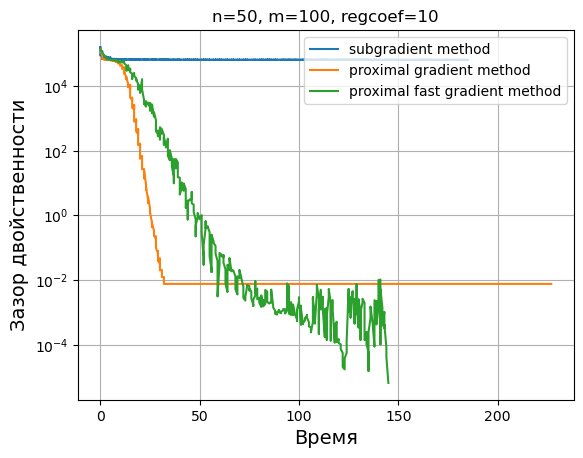

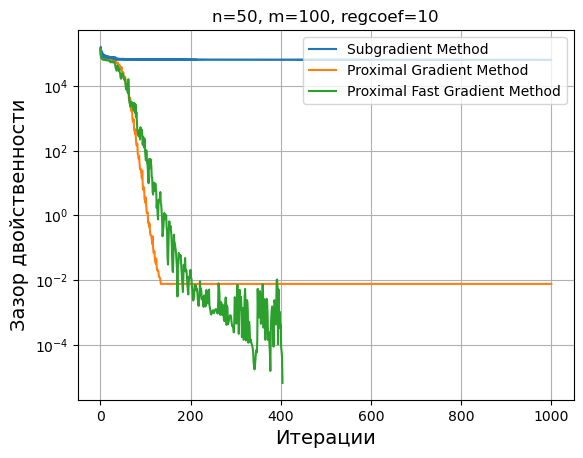

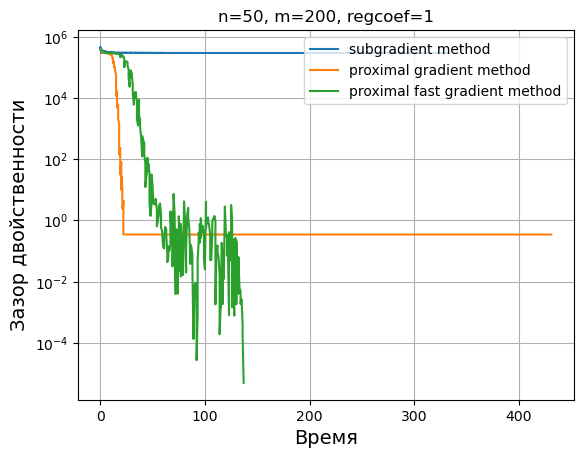

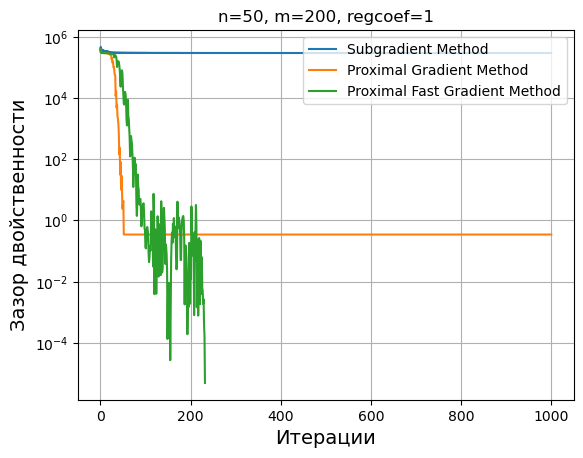

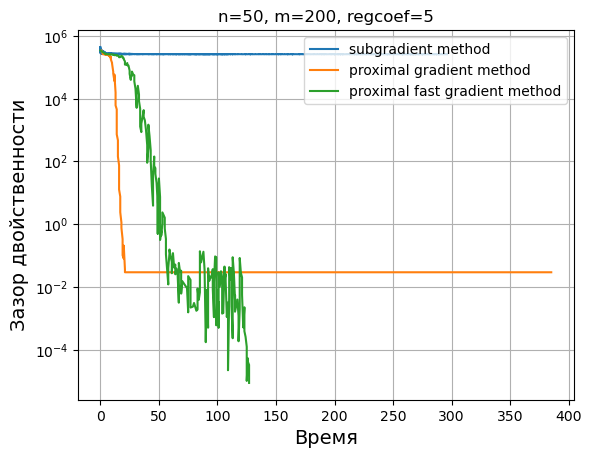

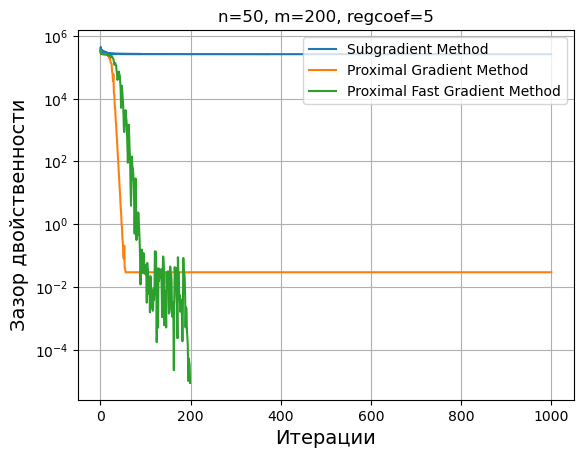

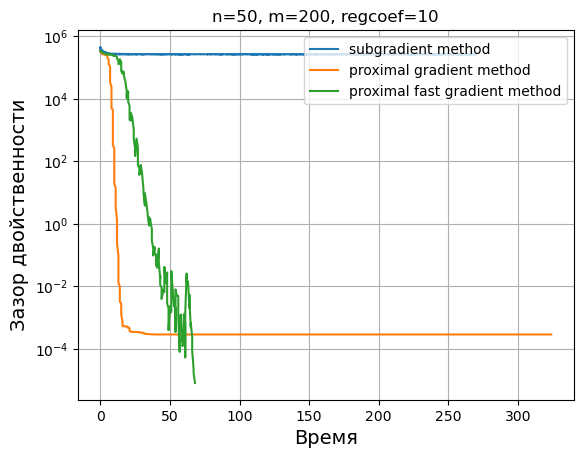

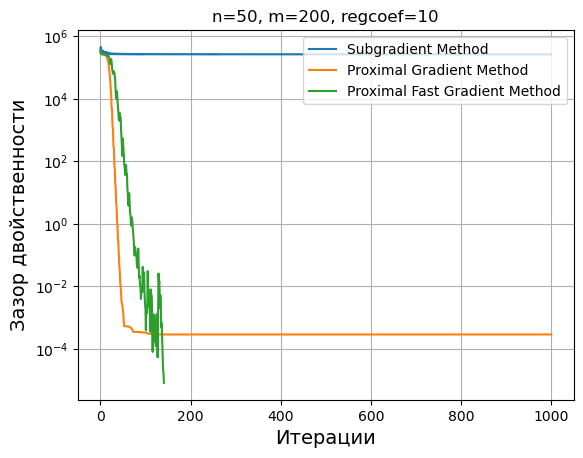

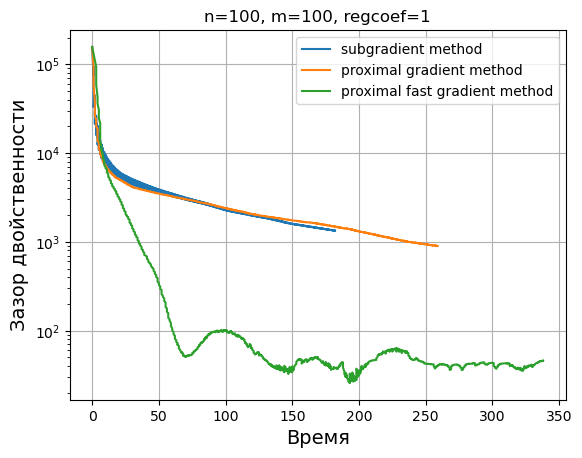

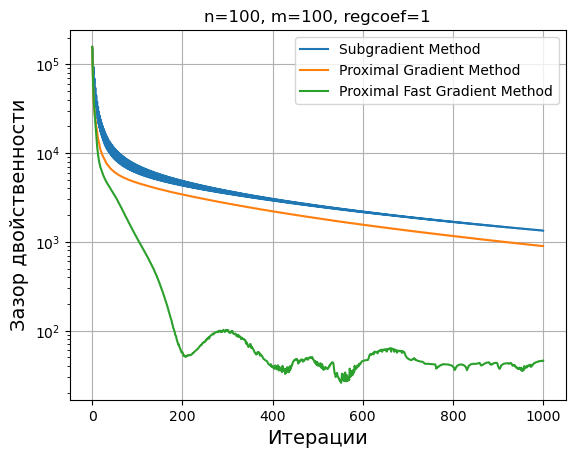

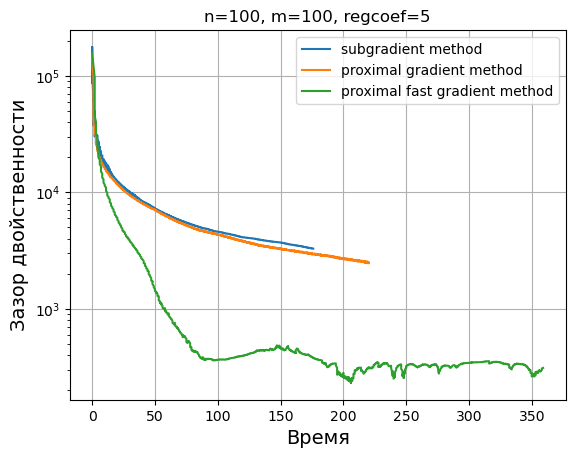

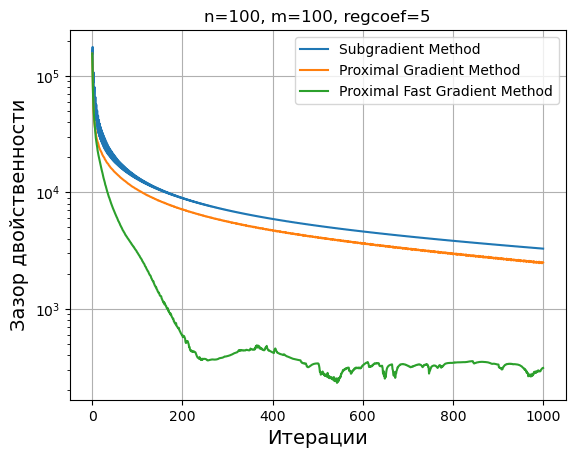

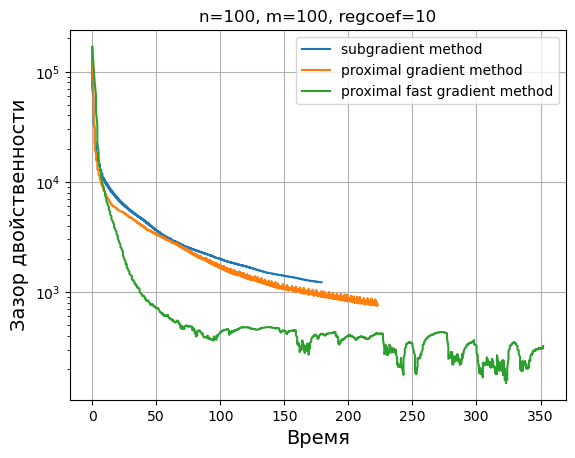

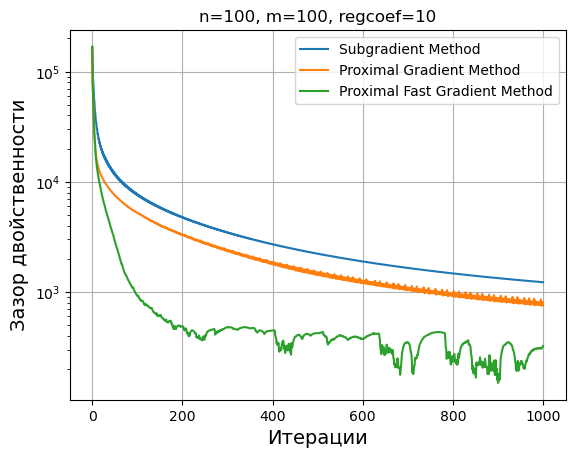

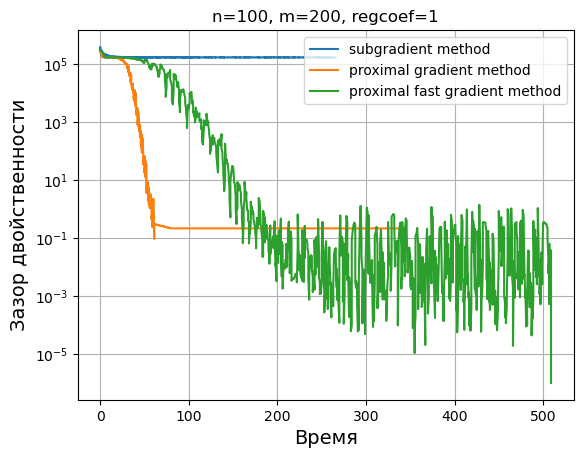

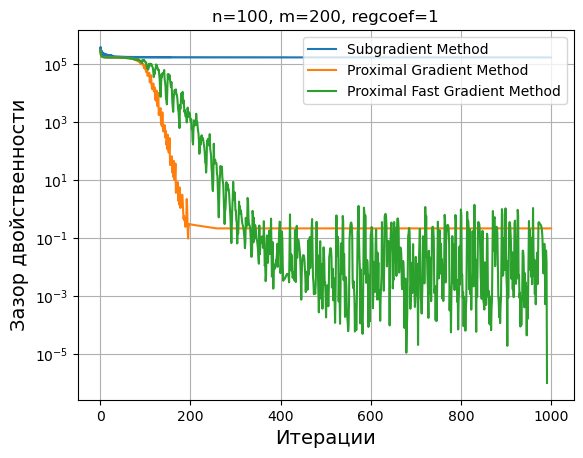

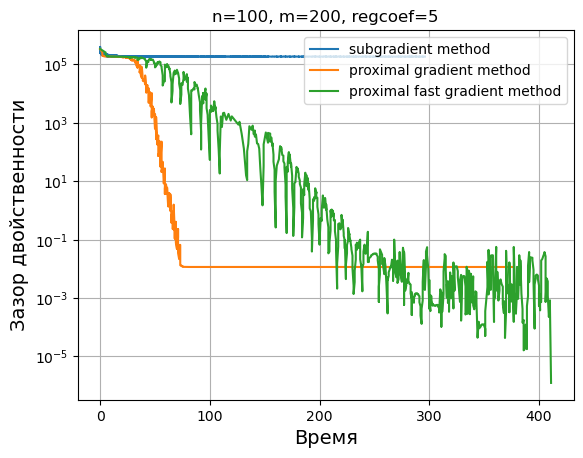

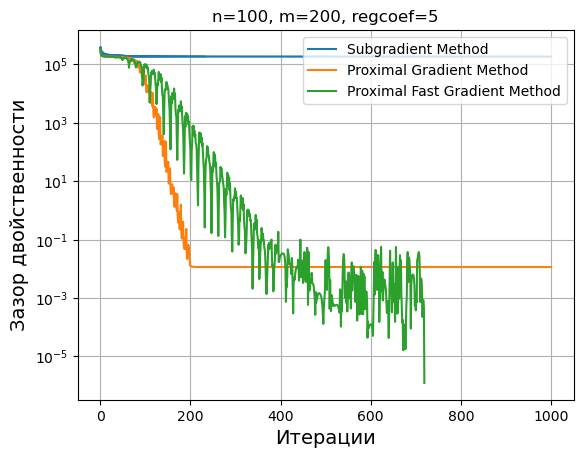

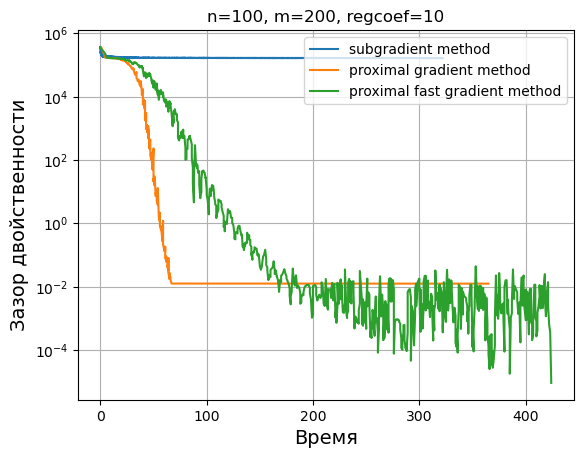

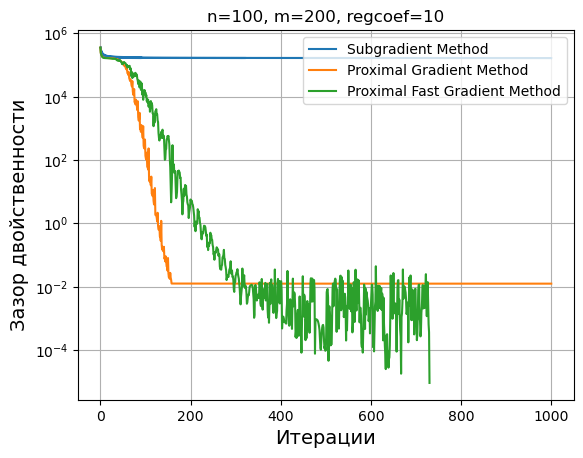

In [10]:
n_size = [50, 100]
m_size = [100, 200]
regcoefs = [1, 5, 10]
methods = [optimization.subgradient_method, 
           optimization.proximal_gradient_method,
           optimization.proximal_fast_gradient_method]

def plot_time(histories, methods, n, m, regcoef):
    plt.figure()
    plt.title('n={}, m={}, regcoef={}'.format(n, m, regcoef))
    for history, method in zip(histories, methods):
        method_name = ' '.join(method.__name__.split('_'))
        y = history['duality_gap']
        x = np.array(history['time']) * 1000 
        plt.plot(x, y, label=method_name)
    plt.xlabel('Время', fontsize=14)
    plt.ylabel('Зазор двойственности', fontsize=14)
    plt.yscale('log')
    plt.legend(fontsize=10, loc=1)
    plt.grid()
    plt.savefig('n={}_m={}_regcoef={}_time'.format(n, m, regcoef)+'.png')
    
def plot_iterations(histories, methods, n, m, regcoef):
    plt.figure()
    plt.title('n={}, m={}, regcoef={}'.format(n, m, regcoef))
    for history, method in zip(histories, methods):
        method_name = ' '.join(method.__name__.split('_')).title()
        y = history['duality_gap']
        x = list(range(len(y))) 
        plt.plot(x, y, label=method_name)
    plt.xlabel('Итерации', fontsize=14)
    plt.ylabel('Зазор двойственности', fontsize=14)
    plt.yscale('log')
    plt.legend(fontsize=10, loc=1)
    plt.grid()
    plt.savefig('n={}_m={}_regcoef={}_iter'.format(n, m, regcoef)+'.png')

    

for n in n_size:
    for m in m_size:
        for r in regcoefs:
                A = np.random.uniform(-100, 100, (m, n))
                b = np.random.uniform(-100, 100, m)
                x_0 = np.zeros(n)
                oracle = oracles.create_lasso_prox_oracle(A, b, r)
                histories = []
                for method in methods:
                    _, _, history = method(oracle, x_0, trace=True)
                    histories.append(history)
                plot_time(histories, methods, n, m, r)
                plot_iterations(histories, methods, n, m, r)
                    